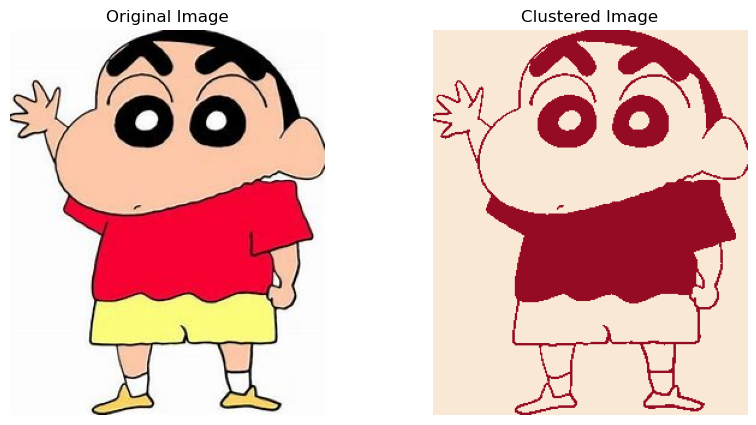

In [2]:
import numpy as np
import cv2 as cv
import skfuzzy as fuzz
from matplotlib import pyplot as plt

def load_and_prepare_image(image_path):
    # 读取图像并转换为一维数组
    image = cv.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    image_flatten = image.reshape(-1, 3)
    return image, image_flatten

def apply_fuzzy_c_means(image, num_classes, iterations=100, m=2.0):
    # 转置图像数据以适应skfuzzy
    image_transposed = image.T

    # 执行模糊C均值聚类
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        image_transposed, num_classes, m, error=0.005, maxiter=iterations, init=None
    )

    # 确定每个像素属于哪个聚类
    membership = np.argmax(u, axis=0)

    # 计算新的聚类中心
    new_means = np.zeros((num_classes, 3), dtype=np.uint8)
    for i in range(num_classes):
        points = image[membership == i]
        if points.size > 0:
            new_means[i] = np.mean(points, axis=0).astype(np.uint8)

    return new_means, membership

def replace_pixels_with_cluster_means(image, means, membership):
    # 创建一个新图像，用聚类中心的颜色替换每个像素
    clustered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        clustered_image[i] = means[membership[i]]
    return clustered_image

def display_image(original_image, clustered_image_1d):
    # 将一维聚类后图像转换回二维，并使用matplotlib显示
    clustered_image_2d = clustered_image_1d.reshape(original_image.shape)
    plt.figure(figsize=(10, 5))

    # 显示原始图像
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
    plt.axis('off')

    # 显示聚类后的图像
    plt.subplot(1, 2, 2)
    plt.title('Clustered Image')
    plt.imshow(cv.cvtColor(clustered_image_2d, cv.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

def main():
    image_path = '123.jpg'
    num_classes = 2

    # 加载和准备图像
    original_image, image_flatten = load_and_prepare_image(image_path)

    # 应用模糊C均值聚类
    means, membership = apply_fuzzy_c_means(image_flatten, num_classes)

    # 替换像素
    clustered_image_1d = replace_pixels_with_cluster_means(image_flatten, means, membership)

    # 显示图像
    display_image(original_image, clustered_image_1d)

if __name__ == "__main__":
    main()